In [13]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(tf.__version__)

2.13.0


### Baixando o dataset MNIST

In [14]:

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Teste do dataset

In [15]:
print("Shape dos dados de treinamento:", x_train.shape)
print("Shape dos rótulos de treinamento:", y_train.shape)
print("Número de exemplos por classe:")
print(pd.Series(y_train).value_counts())

Shape dos dados de treinamento: (60000, 28, 28)
Shape dos rótulos de treinamento: (60000,)
Número de exemplos por classe:
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64


### Dataset Numeros

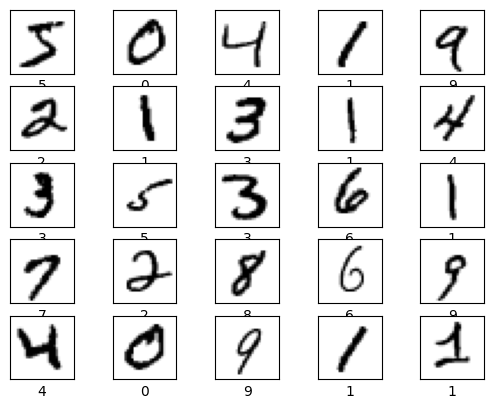

In [16]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_train[i]))

plt.show()

### Frequencia dos numeros no dataset

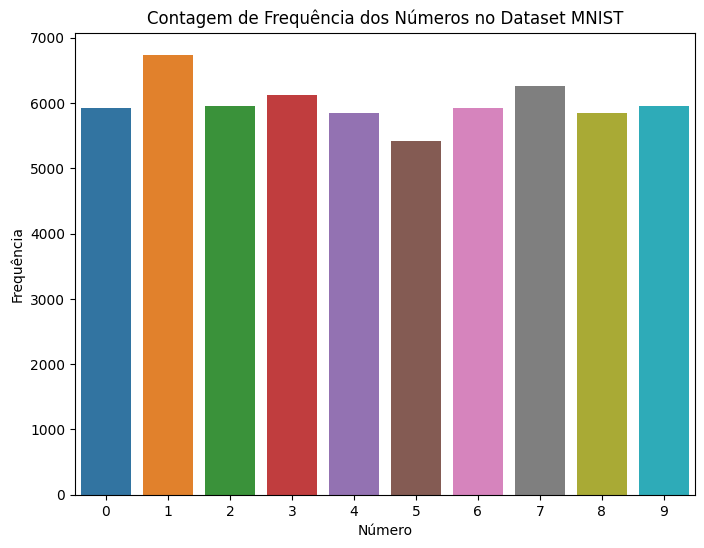

In [17]:

### Contagem de frequência dos números
value_counts = pd.Series(y_train).value_counts().sort_index()

### Plot da contagem de frequência dos números
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel('Número')
plt.ylabel('Frequência')
plt.title('Contagem de Frequência dos Números no Dataset MNIST')
plt.show()

### Checando por valores fora do padrão

In [18]:
np.isnan(x_train).any()


False

In [19]:
np.isnan(x_test).any()

False

### Normalização e Remodelamento (Reshaping)

In [20]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

### One Hot Encoding

In [21]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

### Teste do One Hot Encoding

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)


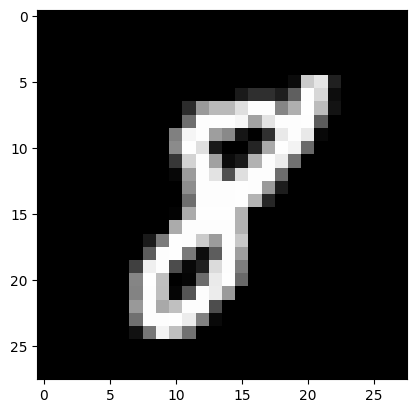

In [32]:
item = 17
plt.imshow(x_train[item][:,:,0], cmap='gray')
print(y_train[item])

### Variáveis iniciais para o treinamento

In [23]:
batch_size = 64
num_classes = 10
epochs = 2

### 

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
]) 

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [25]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [26]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/2
844/844 [==============================] - 104s 123ms/step - loss: 0.2911 - acc: 0.9082 - val_loss: 0.0430 - val_acc: 0.9865
Epoch 2/2
844/844 [==============================] - 105s 124ms/step - loss: 0.0859 - acc: 0.9759 - val_loss: 0.0318 - val_acc: 0.9912


Vamos mudar uma série de parâmetros na rede CNN, em busca de maior acurácia:
- tamanho da rede 
- tamanho da janela de convolução
- stride
- drop-out

### Aumentando o tamanho da rede CNN:

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
]) 

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [35]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/2
844/844 [==============================] - 249s 294ms/step - loss: 0.2310 - acc: 0.9259 - val_loss: 0.0464 - val_acc: 0.9875
Epoch 2/2
844/844 [==============================] - 257s 304ms/step - loss: 0.0694 - acc: 0.9804 - val_loss: 0.0336 - val_acc: 0.9912


### Diminuindo o tamanho da CNN:

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
]) 

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [38]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/2
844/844 [==============================] - 54s 63ms/step - loss: 0.4061 - acc: 0.8698 - val_loss: 0.0678 - val_acc: 0.9790
Epoch 2/2
844/844 [==============================] - 54s 64ms/step - loss: 0.1234 - acc: 0.9633 - val_loss: 0.0437 - val_acc: 0.9865


### Aumentando o tamanho da janela de convolução:

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (7,7), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (7,7), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
]) 

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [44]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/2
844/844 [==============================] - 190s 224ms/step - loss: 0.2500 - acc: 0.9206 - val_loss: 0.0398 - val_acc: 0.9877
Epoch 2/2
844/844 [==============================] - 196s 232ms/step - loss: 0.0693 - acc: 0.9802 - val_loss: 0.0236 - val_acc: 0.9935
